## Import Modules

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Read data

In [74]:
dataset = pd.read_csv('data.csv')
feature = dataset.iloc[:,1:2].values
label = dataset.iloc[:,2].values

## Split dataset

In [75]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 0)

## Different Regression model

In [76]:
mlp =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp.fit(x_train, y_train)

#2 Lasso
lasso = linear_model.Lasso()
lasso.fit(x_train, y_train)

#3 Bayesian
# Bayesian ARD
bayesian_ard = linear_model.ARDRegression(alpha_1=0.001, alpha_2=0.001, lambda_1 = 0.001, lambda_2 = 0.0001)
bayesian_ard.fit(x_train, y_train)
# Bayesian Ridge
bayesian_ridge = linear_model.BayesianRidge(n_iter=100)
bayesian_ridge.fit(x_train, y_train)

#4 RandomForest
random_forest = RandomForestRegressor(n_estimators=100, random_state=0, )
random_forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Visualization

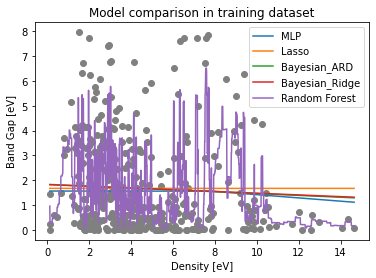

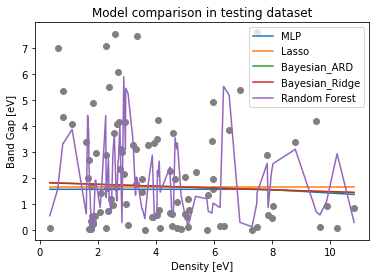

In [77]:
plt.figure(1)
x_grid = np.arange(min(x_train), max(x_train), 0.01)
x_grid = x_grid.reshape(-1, 1)
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_grid, mlp.predict(x_grid), label = 'MLP')
plt.plot(x_grid, lasso.predict(x_grid), label = 'Lasso')
plt.plot(x_grid, bayesian_ard.predict(x_grid), label = 'Bayesian_ARD')
plt.plot(x_grid, bayesian_ridge.predict(x_grid), label = 'Bayesian_Ridge')
plt.plot(x_grid, random_forest.predict(x_grid), label = 'Random Forest')

plt.title('Model comparison in training dataset')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.legend(loc = 'best')

plt.figure(2)
index = np.argsort(x_test, axis = 0)
x_test = np.take_along_axis(x_test, index, axis = 0)
y_test = np.reshape(y_test, (-1,1))
y_test = np.take_along_axis(y_test, index, axis = 0)
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, mlp.predict(x_test), label = 'MLP')
plt.plot(x_test, lasso.predict(x_test), label = 'Lasso')
plt.plot(x_test, bayesian_ard.predict(x_test), label = 'Bayesian_ARD')
plt.plot(x_test, bayesian_ridge.predict(x_test), label = 'Bayesian_Ridge')
plt.plot(x_test, random_forest.predict(x_test), label = 'Random Forest')
plt.title('Model comparison in testing dataset')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.legend(loc = 'best')

# Different hyperparameters to influencce model performance

## Stage_1 Different activation function

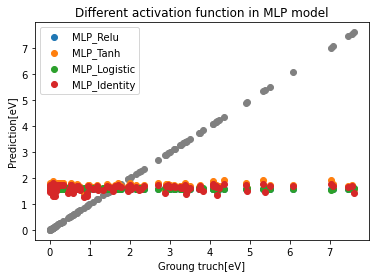

In [78]:
mlp_act_relu =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_act_relu.fit(x_train, y_train)

mlp_act_tanh =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_act_tanh.fit(x_train, y_train)

mlp_act_logistic =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_act_logistic.fit(x_train, y_train)

mlp_act_identity =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='identity', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_act_identity.fit(x_train, y_train)

plt.figure(3)
plt.scatter(y_test, y_test, color = 'gray')
plt.scatter(y_test, mlp_act_relu.predict(x_test), label = 'MLP_Relu')
plt.scatter(y_test, mlp_act_tanh.predict(x_test), label = 'MLP_Tanh')
plt.scatter(y_test, mlp_act_logistic.predict(x_test), label = 'MLP_Logistic')
plt.scatter(y_test, mlp_act_identity.predict(x_test), label = 'MLP_Identity')
plt.title('Different activation function in MLP model')
plt.xlabel('Groung truch' '[eV]')
plt.ylabel('Prediction' '[eV]')
plt.legend(loc = 'best')

## Stage_2 Different learning rate

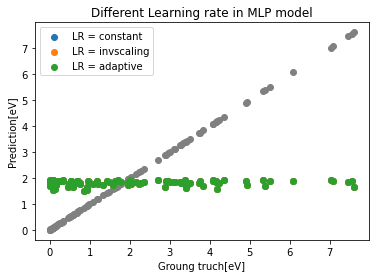

In [79]:
mlp_lr_11 =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate = 'constant',learning_rate_init=0.1, max_iter=10000, random_state=497)
mlp_lr_11.fit(x_train, y_train)

mlp_lr_12 =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate = 'invscaling',learning_rate_init=0.1, max_iter=10000, random_state=497)
mlp_lr_12.fit(x_train, y_train)

mlp_lr_13 =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate = 'adaptive',learning_rate_init=0.1, max_iter=10000, random_state=497)
mlp_lr_13.fit(x_train, y_train)

plt.figure(4)
plt.scatter(y_test, y_test, color = 'gray')
plt.scatter(y_test, mlp_lr_11.predict(x_test), label = 'LR = constant')
plt.scatter(y_test, mlp_lr_12.predict(x_test), label = 'LR = invscaling')
plt.scatter(y_test, mlp_lr_13.predict(x_test), label = 'LR = adaptive')
plt.title('Different Learning rate in MLP model')
plt.xlabel('Groung truch' '[eV]')
plt.ylabel('Prediction' '[eV]')
plt.legend(loc = 'best')

## Stage_3 Different structure

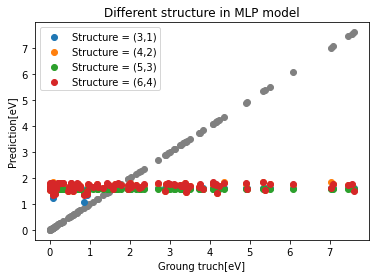

In [80]:
mlp_str_1 =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_str_1.fit(x_train, y_train)

mlp_str_2 =  MLPRegressor(hidden_layer_sizes=(3, 1), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_str_2.fit(x_train, y_train)

mlp_str_3 =  MLPRegressor(hidden_layer_sizes=(4, 2), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_str_3.fit(x_train, y_train)

mlp_str_4 =  MLPRegressor(hidden_layer_sizes=(6, 4), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_str_4.fit(x_train, y_train)

plt.figure(5)
plt.scatter(y_test, y_test, color = 'gray')
plt.scatter(y_test, mlp_str_2.predict(x_test), label = 'Structure = (3,1)')
plt.scatter(y_test, mlp_str_3.predict(x_test), label = 'Structure = (4,2)')
plt.scatter(y_test, mlp_str_1.predict(x_test), label = 'Structure = (5,3)')
plt.scatter(y_test, mlp_str_4.predict(x_test), label = 'Structure = (6,4)')
plt.title('Different structure in MLP model')
plt.xlabel('Groung truch' '[eV]')
plt.ylabel('Prediction' '[eV]')
plt.legend(loc = 'best')

## Stage_4 Different optimizer

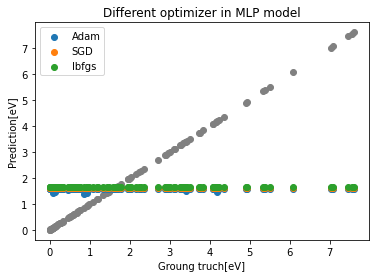

In [81]:
mlp_opt_adam =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_opt_adam.fit(x_train, y_train)

mlp_opt_sgd =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_opt_sgd.fit(x_train, y_train)

mlp_opt_lbfgs =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='lbfgs', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlp_opt_lbfgs.fit(x_train, y_train)

plt.figure(6)
plt.scatter(y_test, y_test, color = 'gray')
plt.scatter(y_test, mlp_opt_adam.predict(x_test), label = 'Adam')
plt.scatter(y_test, mlp_opt_sgd.predict(x_test), label = 'SGD')
plt.scatter(y_test, mlp_opt_lbfgs.predict(x_test), label = 'lbfgs')
plt.title('Different optimizer in MLP model')
plt.xlabel('Groung truch' '[eV]')
plt.ylabel('Prediction' '[eV]')
plt.legend(loc = 'best')

plt.show()